In [3]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import joblib

In [4]:
# Chargement des données de corpus

corpus = pd.read_csv("../datafinal/corpus_equilibre.csv")

In [5]:
# Nettoyage des textes
def nettoyer_texte(texte):
    texte = str(texte).lower()
    texte = re.sub(r"\d+", "", texte)
    texte = texte.translate(str.maketrans("", "", string.punctuation))
    return texte.strip()

corpus["texte_nettoye"] = corpus["texte_nettoye"].astype(str).apply(nettoyer_texte)

/tmp/ipykernel_122383/1764722349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=corpus, x="registre", palette="Set2")


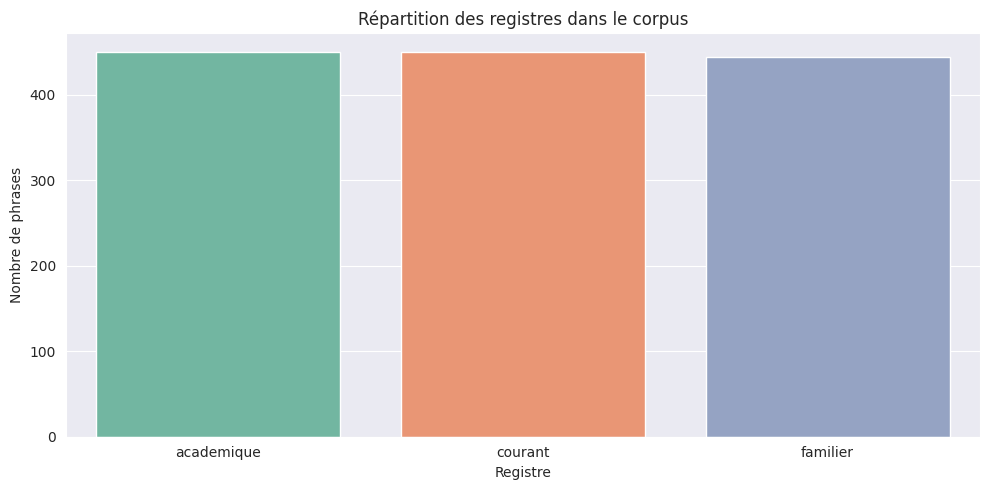

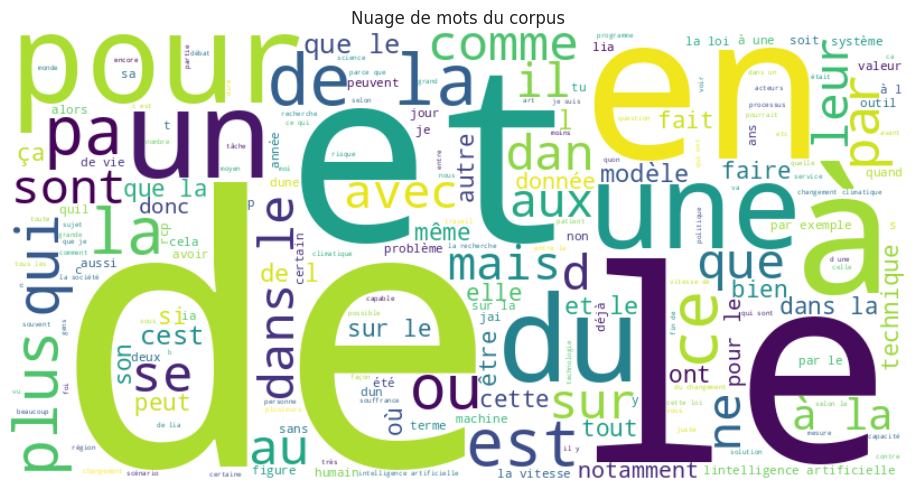

In [7]:
# Graphique de distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=corpus, x="registre", palette="Set2")
plt.title("Répartition des registres dans le corpus")
plt.xlabel("Registre")
plt.ylabel("Nombre de phrases")
plt.tight_layout()
plt.show()

# Nuage de mots
texte_total = " ".join(corpus["texte_nettoye"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texte_total)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots du corpus")
plt.tight_layout()
plt.show()


In [29]:
# 4. Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus["texte_nettoye"])
y = corpus["registre"]

In [30]:
#  5. Séparation Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
#  6. Entraînement du modèle
model = MultinomialNB()
model.fit(X_train, y_train)


NameError: name 'MultinomialNB' is not defined

In [32]:
# 7. Évaluation du modèle
y_pred = model.predict(X_test)
print("\n Rapport de classification :")
print(classification_report(y_test, y_pred))


 Rapport de classification :
              precision    recall  f1-score   support

  academique       0.97      0.84      0.90        89
     courant       0.87      0.90      0.89        94
    familier       0.88      0.97      0.92        86

    accuracy                           0.90       269
   macro avg       0.91      0.90      0.90       269
weighted avg       0.91      0.90      0.90       269



In [33]:
#  8. Prédiction manuelle
def predire_registre(phrase):
    phrase_clean = nettoyer_texte(phrase)
    vect = vectorizer.transform([phrase_clean])
    return model.predict(vect)[0]



Phrase : frere wesh j'ai pas capté le truc
Registre prédit : familier


In [34]:
# 9. Sauvegarde du modèle
joblib.dump(model, "../model/modele_registre.pkl")
joblib.dump(vectorizer, "../model/vectorizer.pkl")
print("\n Modèl et vectoriseur sauvegardés.")



✅ Modèle et vectoriseur sauvegardés.
